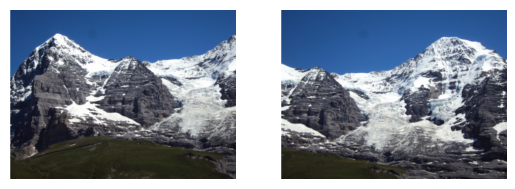

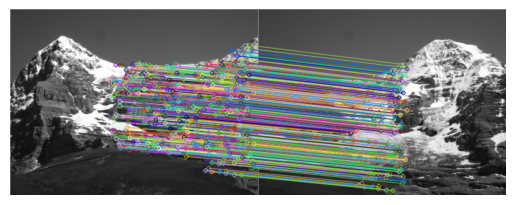

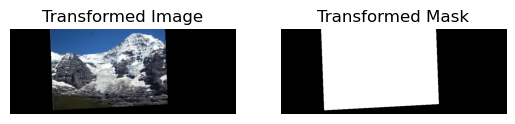

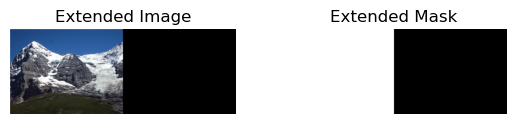

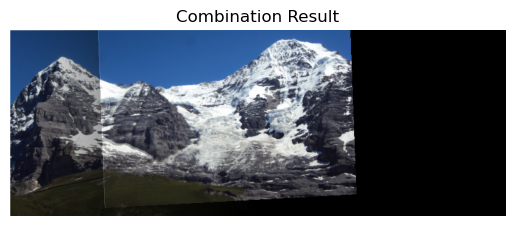

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1=cv2.imread('hill_left.jpg')
img2=cv2.imread('hill_right.jpg')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

grayImg1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
grayImg2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1,des1=sift.detectAndCompute(grayImg1,None)
kp2,des2=sift.detectAndCompute(grayImg2,None)

bf=cv2.BFMatcher()
matches=bf.knnMatch(des1,des2,k=2)

good=[]
for m,n in matches:
    if m.distance<0.5*n.distance:
        good.append([m])

result=cv2.drawMatchesKnn(grayImg1,kp1,grayImg2,kp2,good,None,flags=2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

src=np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst=np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2)

M, _=cv2.estimateAffine2D(src,dst)
warpedImg=cv2.warpAffine(img2, M, (img1.shape[1]+img2.shape[1], max(img1.shape[0], img2.shape[0])), flags=cv2.WARP_INVERSE_MAP)
warpedMask=cv2.warpAffine(np.ones_like(grayImg2), M, (img1.shape[1]+img2.shape[1], max(img1.shape[0], img2.shape[0])), flags=cv2.WARP_INVERSE_MAP)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(warpedImg, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warpedMask, cmap='gray')
plt.title('Transformed Mask')
plt.axis('off')

plt.show()

extendedImg1=np.zeros_like(warpedImg)
extendedImg1[:img1.shape[0], :img1.shape[1], :]=img1

extendedMask=np.zeros_like(warpedMask)
extendedMask[:img1.shape[0], :img1.shape[1]]=1

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(extendedImg1, cv2.COLOR_BGR2RGB))
plt.title('Extended Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(extendedMask, cmap='gray')
plt.title('Extended Mask')
plt.axis('off')

plt.show()

combinedImg=np.zeros_like(warpedImg)
for i in range(warpedImg.shape[0]):
    for j in range(warpedImg.shape[1]):
        if i<img1.shape[0] and j<img1.shape[1]:
            alpha=float(j)/img1.shape[1] 
            combinedImg[i, j]=(1-alpha)*extendedImg1[i, j]+alpha*warpedImg[i, j]
        else:
            combinedImg[i, j]=warpedImg[i, j]
            
plt.imshow(cv2.cvtColor(combinedImg, cv2.COLOR_BGR2RGB))
plt.title('Combination Result')
plt.axis('off')
plt.show()
